## 공통 코드

In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# sklearn ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 선형 회귀

### 정규 방정식

In [4]:
# 샘플 데이터 생성
X = 2 * np.random.rand(100, 1) # 100개의 독립 변수
y = 4 + 3 * X + np.random.randn(100, 1) # 100개의 종속 변수

# 모든 샘플에 1을 추가
X_b = np.c_[np.ones((100, 1)), X]

# 역행렬을 구하고 행렬 곱셈을 수행
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) # noise 때문에 정확히 4와 3은 나오지 않음

[[4.21509616]
 [2.77011339]]


In [5]:
# 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.21509616]
 [9.75532293]]


### 보스턴 주택 가격 예측 - 선형 회귀

In [15]:
# 데이터 가져오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [16]:
# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
"RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
# boston 데이터 세트의 target 배열은 주택 가격임 . 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()


Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


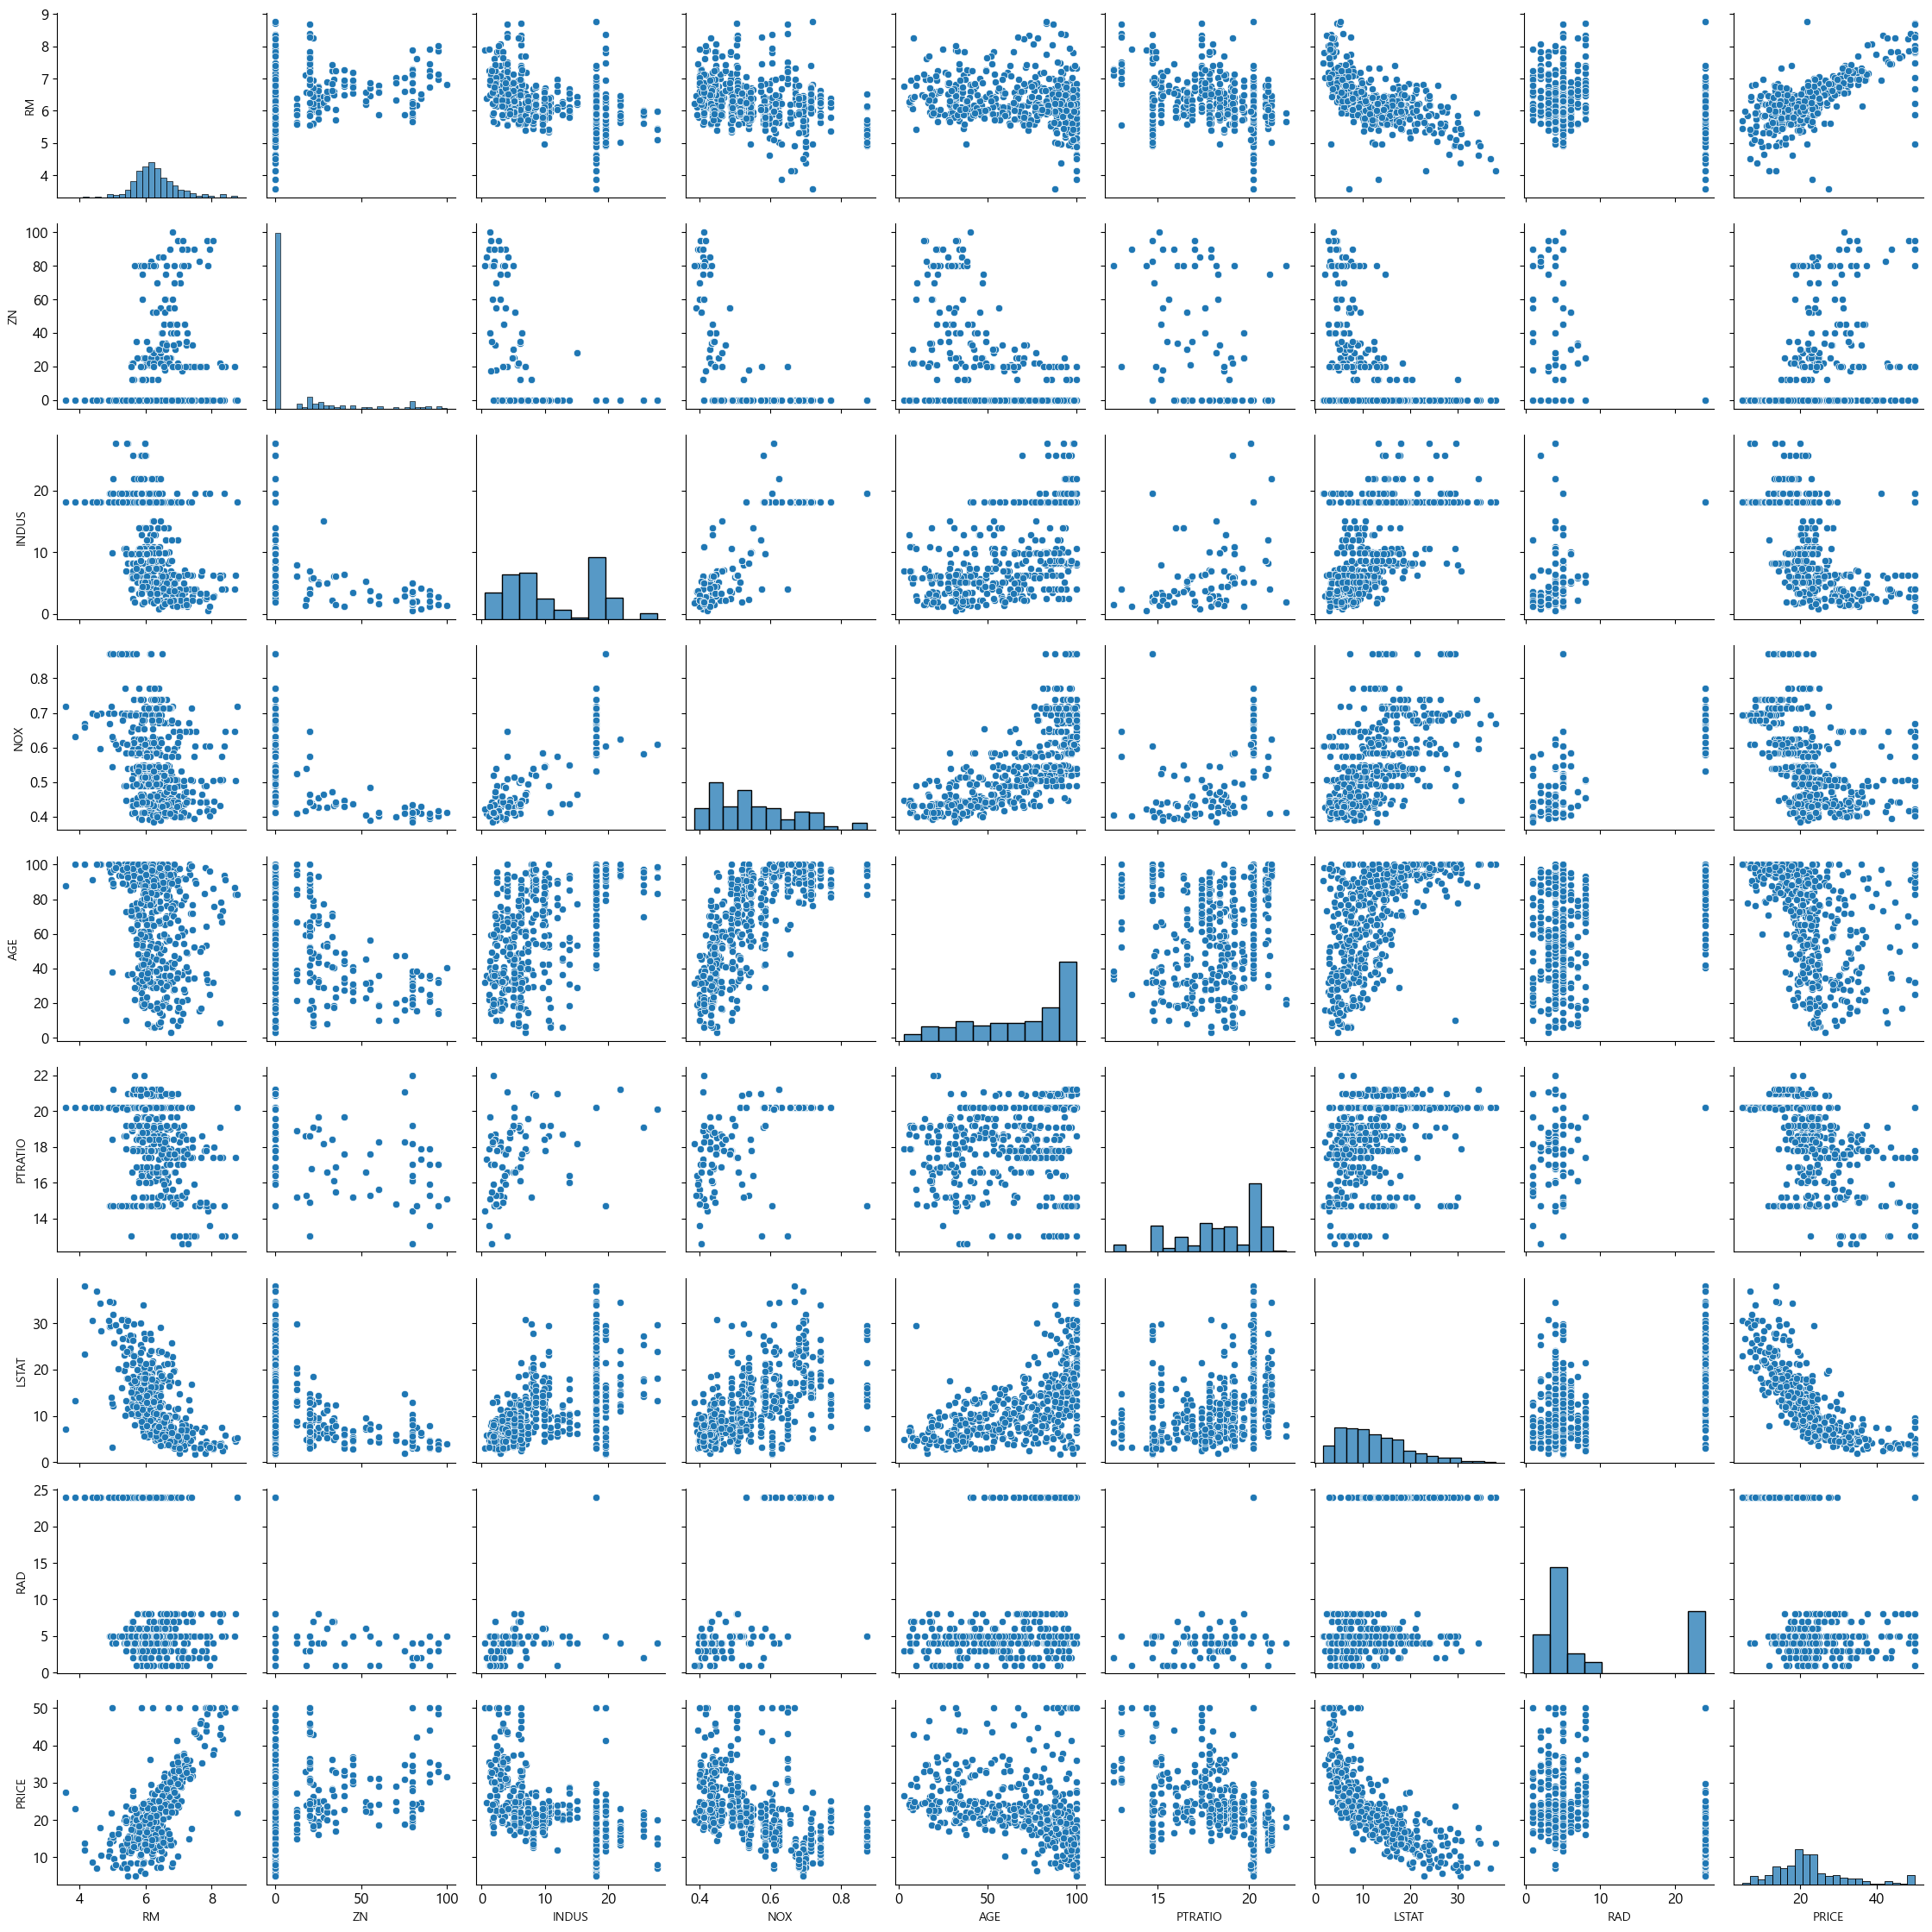

In [19]:
# 상관 관계를 파악하고자 하는 열의 리스트
cols = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD', 'PRICE']
sns.pairplot(bostonDF[cols], height=2.5)
plt.tight_layout()
plt.show()

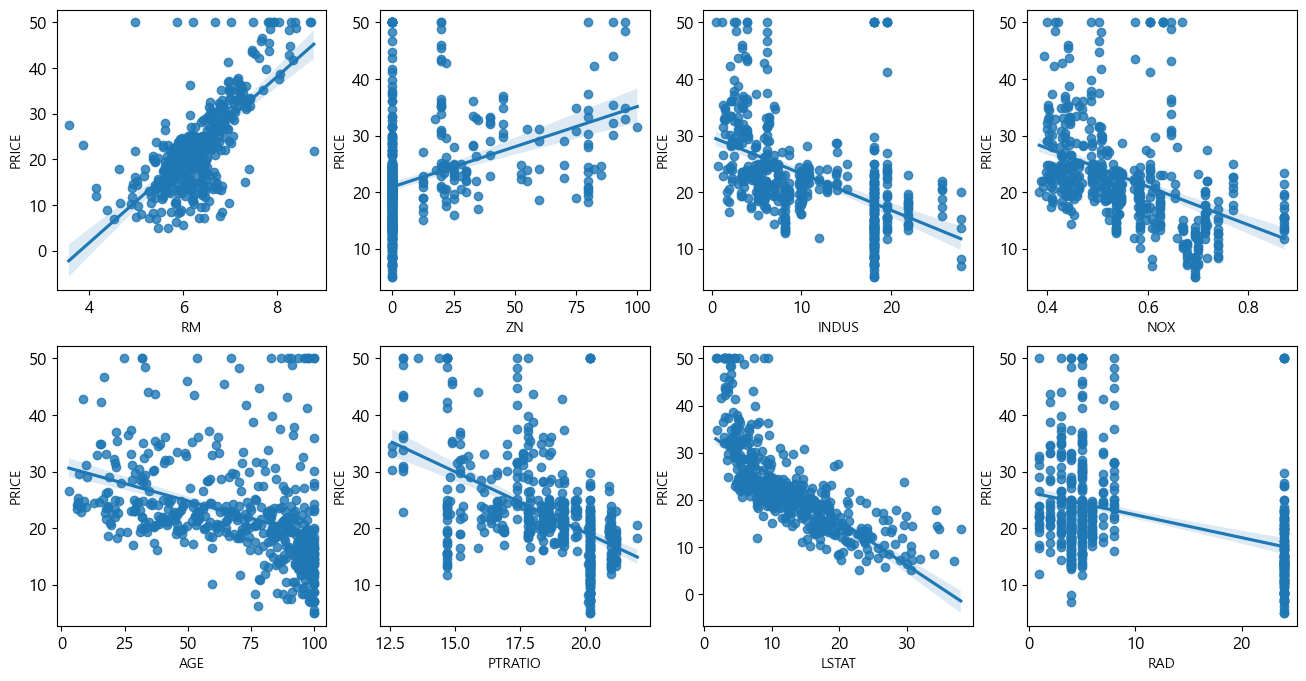

In [21]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [24]:
# RM 을 이용한 PRICE 예측 단변량 회귀
from scipy import stats
slope, intercept, r_value, p_value, stderr = stats.linregress(bostonDF['RM'],
bostonDF['PRICE'])
print("기울기:", slope)
print("절편:", intercept)
print("상관계수", r_value)
print("불확실성 정도:", p_value)
print("방이 4개일 때 주택 가격:", end=' ')
print((4 * slope + intercept) * 1000, '$')
print('=======================================================')


기울기: 9.102108981180306
절편: -34.67062077643854
상관계수 0.695359947071539
불확실성 정도: 2.487228871008377e-74
방이 4개일 때 주택 가격: 1737.8151482826852 $


In [25]:
#단병량 회귀 분석 수행
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
slr.fit(X, y)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)


기울기: 9.102
절편: -34.671


In [ ]:
#매개변수
#max_trials: 최대 반복 횟수
#min_samples: 최소 샘플 개수
#loss: 오차 측정 함수
#residual_threshold: 오차의 임계값

#RANSAC 방법을 이용한 회귀
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100, min_samples=50, loss="absolute_error",
                        residual_threshold=5.0, random_state=42)
ransac.fit(X, y)

print("기울기:", ransac.estimator_.coef_[0])
print("절편:", ransac.estimator_.intercept_)

In [ ]:
from sklearn.model_selection import train_test_split

X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.3, random_state=42)

slr = LinearRegression()

slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_pred = slr.predict(X_test)
 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("훈련 데이터의 평균 제곱 오차:", mean_squared_error(y_train, y_train_pred))
print("테스트 데이터의 평균 제곱 오차:", mean_squared_error(y_test, y_pred))

print("훈련 데이터의 r2 score:", r2_score(y_train, y_train_pred))
print("테스트 데이터의 r2 score:", r2_score(y_test, y_pred))